# CS4320 Introduction to Machine Learning

**Please type your group name here:**


In [3]:
GroupName = "NoProblem"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents

1. [Understanding the problem](#1)
2. [Imports](#2)
   1. [Importing Packages](#2a)
   2. [Data splitting](#2b)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5)
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11)
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)


<!-- BEGIN QUESTION -->

## 1 Prediction Problem and Explaination <a name="1"></a>

<hr>

**Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset.**


The problem is to forecast store sales for _Corporación Favorita_, a large Ecuadorian-based grocery retailer. The goal is to use previous sales data. The previously sales data is _family_ category which has a _store_nbr_, total number of items in that category that were _onpromotion_ that day, the specific date, and the total items sold that day for that family. The dates are able to be cross referenced with holidays in order to get a better time prediction. The family I am assuming will be very time dependent as needed change over the course of the year and many sales in my experience are holiday dependent.


<!-- END QUESTION -->

<br><br>


## 2 Imports <a name="2"></a>

<hr>


### 2a Importing Packages <a name="2a"></a>

<hr>

**Import all necessary packages**


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

<!-- BEGIN QUESTION -->

### 2b Data splitting <a name="2b"></a>

<hr>

**Split the data into train and test portions. Note that the test.csv is the end file to test, not the data split for testing**


In [5]:
dataset_df = pd.read_csv('data/train.csv')
final_test_df = pd.read_csv('data/test.csv')

In [6]:
# split into train and test sets (in this case test_df is our validation set)
train_df, test_df = train_test_split(dataset_df, test_size=0.3, shuffle=False)

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>

<hr>


### Perform exploratory data analysis on the train set, including summary statistics


In [7]:
display(train_df.head())
display(train_df.info())

pd.set_option('display.float_format', '{:.2f}'.format)

display("Numerical Data Description")
display(train_df.describe(include=['int64', 'float64']))

display("Categorical Data Description")
display(train_df.describe(include=['object', 'datetime64'], datetime_is_numeric=True))

display("Family (Category) Counts")
display(train_df['family'].value_counts())

display("First and last date")
display(train_df['date'].min())
display(train_df['date'].max())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100621 entries, 0 to 2100620
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 112.2+ MB


None

'Numerical Data Description'

,id,store_nbr,sales,onpromotion
count,2100621.00,2100621.00,2100621.00,2100621.00
mean,1050310.00,27.50,312.81,0.96
std,606397.19,15.58,982.46,7.35
min,0.00,1.00,0.00,0.00
25%,525155.00,14.00,0.00,0.00
50%,1050310.00,27.00,6.00,0.00
75%,1575465.00,41.00,168.00,0.00
max,2100620.00,54.00,46271.00,235.00


'Categorical Data Description'

,date,family
count,2100621,2100621
unique,1179,33
top,2013-01-01,AUTOMOTIVE
freq,1782,63656


'Family (Category) Counts'

AUTOMOTIVE                    63656
BEAUTY                        63656
BEVERAGES                     63656
BOOKS                         63656
BREAD/BAKERY                  63656
BABY CARE                     63656
PERSONAL CARE                 63655
LINGERIE                      63655
LIQUOR,WINE,BEER              63655
MAGAZINES                     63655
MEATS                         63655
POULTRY                       63655
PET SUPPLIES                  63655
PLAYERS AND ELECTRONICS       63655
LADIESWEAR                    63655
PREPARED FOODS                63655
PRODUCE                       63655
SCHOOL AND OFFICE SUPPLIES    63655
LAWN AND GARDEN               63655
HOME AND KITCHEN II           63655
HOME CARE                     63655
HOME APPLIANCES               63655
HOME AND KITCHEN I            63655
HARDWARE                      63655
GROCERY II                    63655
GROCERY I                     63655
FROZEN FOODS                  63655
EGGS                        

'First and last date'

'2013-01-01'

'2016-03-27'

_Summary Statistics_

1. Here, we can see that there are 2 discrete varaibles: _date_ (1684 dates ranging from 2013 to 2016) and _family_ (33 unique family categories which have near equal statified counts).
2. The rest of the variables are numerical: id (unique identifier, discrete), store_nbr (1-54, discrete), sales (appears to be skewed, need to see visualization, continuous), and onpromotion (appears to be skewed, need to see visualization).


### Useful Visual Statistics


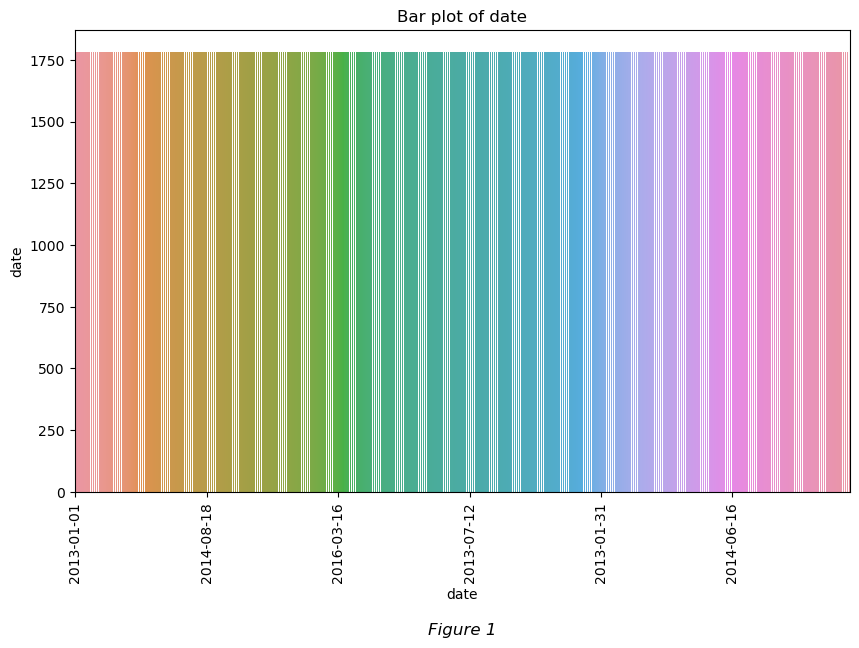

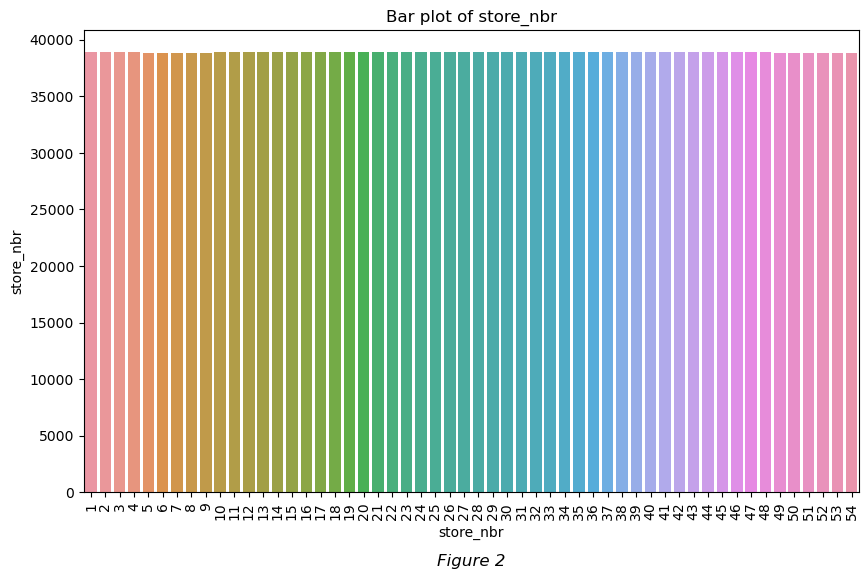

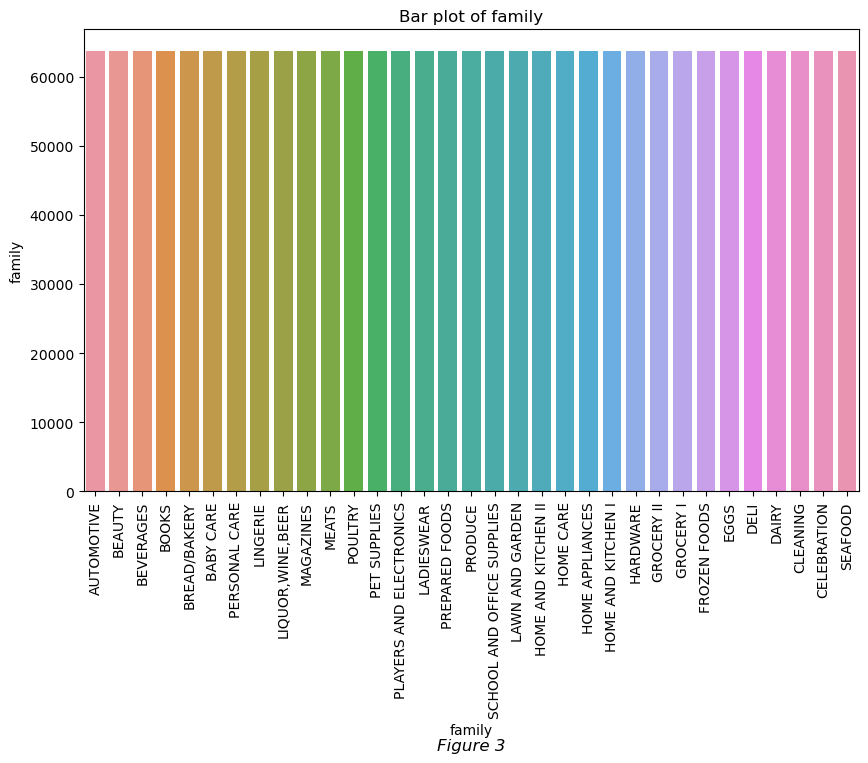

In [8]:

eda_df = train_df.copy(deep=True)

# Create bar plot for 'date'
freq_df = eda_df['date'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='date', data=freq_df)
plt.title('Bar plot of date')
plt.xlabel('date')
plt.xticks(np.arange(0, len(freq_df['index']), step=200), rotation=90)
plt.text(0.5, -0.30, 'Figure 1', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

# Create bar plot for 'store_nbr'
freq_df = eda_df['store_nbr'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='store_nbr', data=freq_df)
plt.title('Bar plot of store_nbr')
plt.xlabel('store_nbr')
plt.xticks(rotation=90)
plt.text(0.5, -0.15, 'Figure 2', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

# Create bar plot for 'family'
freq_df = eda_df['family'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='family', data=freq_df)
plt.title('Bar plot of family')
plt.xlabel('family')
plt.xticks(rotation=90)
plt.text(0.5, -0.55, 'Figure 3', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

In Figures 1,2, and 3, we are shown that _family_, _date_, and _store_nbr_ are all generally stratified. This is good as it means that we have a good distribution of data for each of these variables.


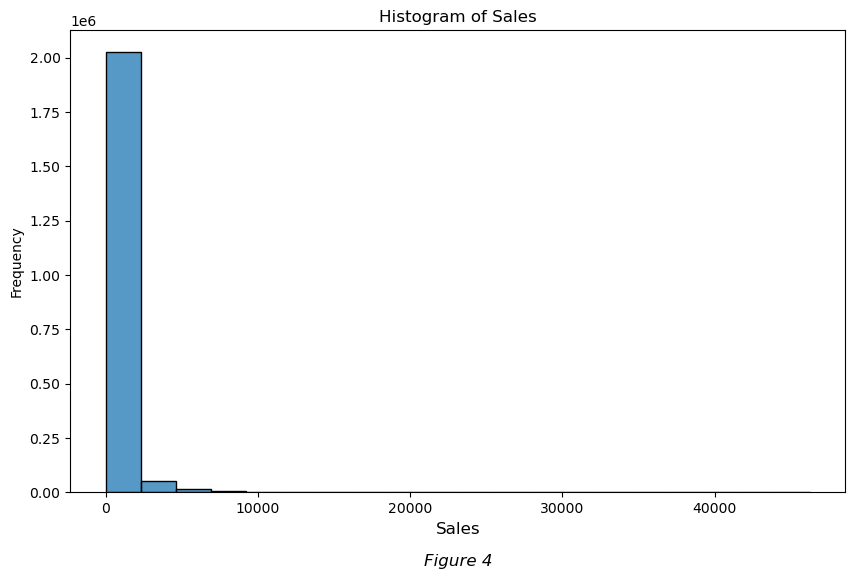

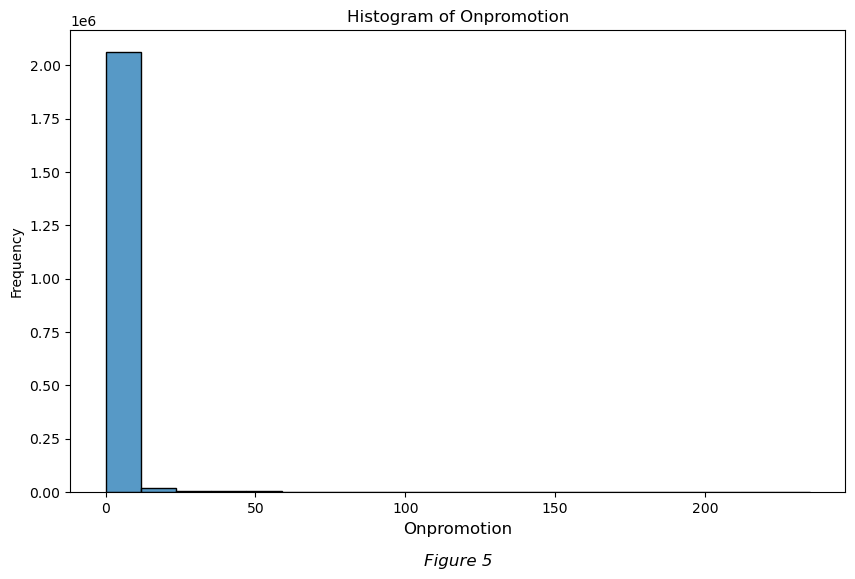

In [9]:
# Show all sales 
plt.figure(figsize=(10, 6))
sns.histplot(train_df['sales'], bins=20)
plt.title('Histogram of Sales')
plt.xlabel('Sales', fontsize=12)
plt.text(0.5, -0.15, 'Figure 4', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.ylabel('Frequency')
plt.show()

# Show all onpromotion
plt.figure(figsize=(10, 6))
sns.histplot(train_df['onpromotion'], bins=20)
plt.title('Histogram of Onpromotion')
plt.xlabel('Onpromotion', fontsize=12)
plt.text(0.5, -0.15, 'Figure 5', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.ylabel('Frequency')
plt.show()

ONPROMOTION INVESTIGATION


C:\Users\sarad\AppData\Local\Temp\ipykernel_24552\1837198173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


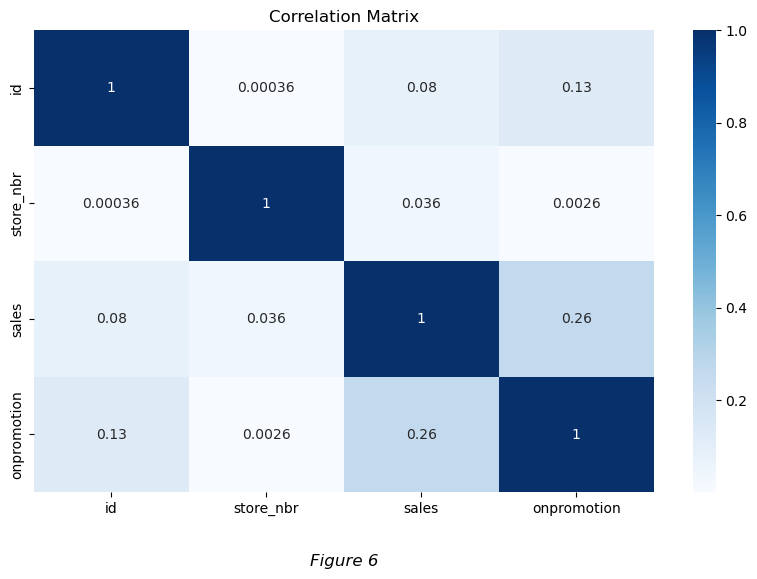

In [10]:
''' Test to see if Onpromotion should be kept'''
corr_matrix = train_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.text(0.5, -0.15, 'Figure 6', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

_onpromotion_ in Figure 6 has the highest correlation to sales, incidating it should be kept.


In [11]:
''' We will test the Onpromotion variable, since it is an independent varaible, 
to see if Feature Cutting should be used. The feature cut would be the upper quantile'''

onpromo_zero_cnt = len(train_df[train_df['onpromotion'] == 0])
ratio = onpromo_zero_cnt / len(train_df)
print("Ratio of Zero in Onpromotion: {:.2f}".format(ratio))

Ratio of Zero in Onpromotion: 0.89


In [12]:
'''Since Ratio is too high, we will not use Feature Cutting and instead use ln(1+x) transformation to normalize the data, 
then use StandardScalar Feature Scaling in preprocessing. Until Feature Engineering, we will use the copy dateframe, eda_df''' 
eda_df['onpromotion'] = np.log1p(eda_df['onpromotion'])

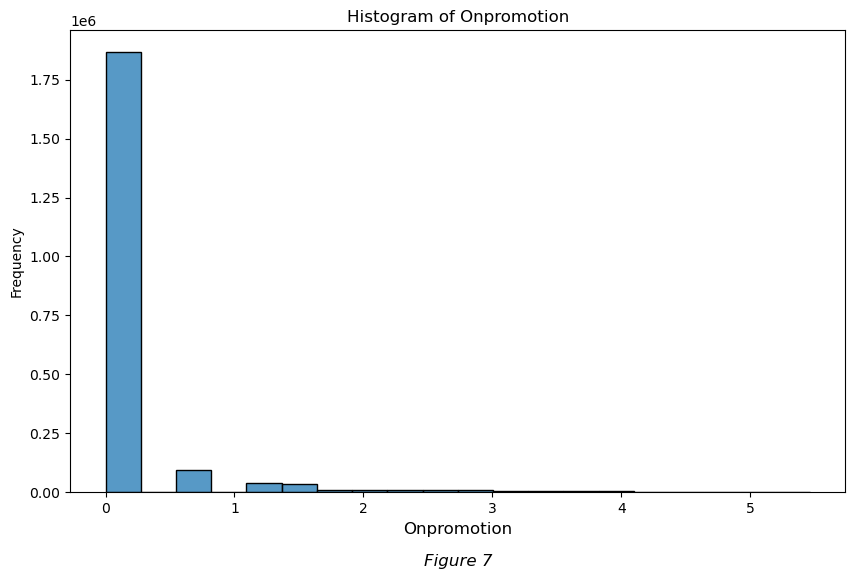

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df['onpromotion'], bins=20)
plt.title('Histogram of Onpromotion')
plt.xlabel('Onpromotion', fontsize=12)
plt.text(0.5, -0.15, 'Figure 7', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.ylabel('Frequency')
plt.show()

SALES INVESTIGATION


In [14]:
''' Test to see sales upper quantile significance '''

' Test to see sales upper quantile significance '

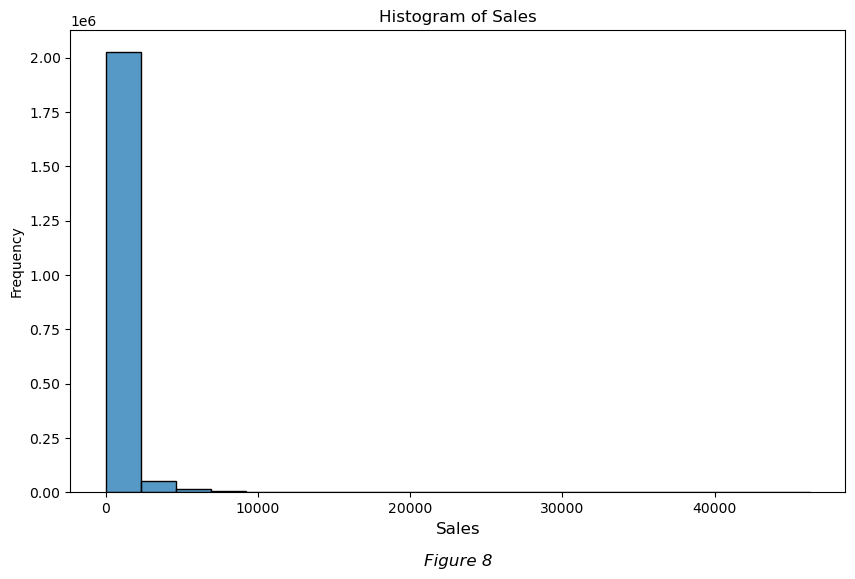

In [15]:
''' For sales, since it is the dependent variable, Feature Cutting is not the first choice. Observing that the upper quantile of _sales_ is significant, we will apply a transformation to normalize the data, then use StandardScalar Feature Scaling in preprocessing'''
eda_df['sales'] = np.log1p(eda_df['sales'])

plt.figure(figsize=(10, 6))
sns.histplot(train_df['sales'], bins=20)
plt.title('Histogram of Sales')
plt.xlabel('Sales', fontsize=12)
plt.text(0.5, -0.15, 'Figure 8', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.ylabel('Frequency')
plt.show()

log(1+x) did not do much for _onpromotion_ and _sales_, showing that StandardScalar may not be the better scalar to use, and MinMax will need to be used.


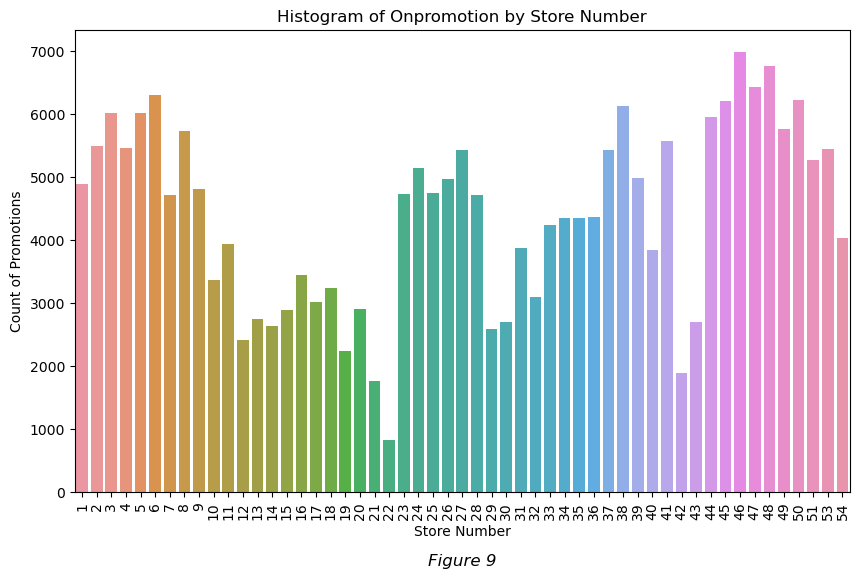

In [16]:
# Plot a histogram, seeing if some stores are more inclined to do promotions
promotion_store = train_df[train_df['onpromotion'] != 0].groupby('store_nbr')['onpromotion'].count().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="store_nbr", y="onpromotion", data=promotion_store)
plt.title('Histogram of Onpromotion by Store Number')
plt.xlabel('Store Number')
plt.ylabel('Count of Promotions')
plt.xticks(rotation=90)
plt.text(0.5, -0.15, 'Figure 9', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

The correlation matrix shows _store_nbr_ and _sales_ as not being correlated at all. It appears the _store_nbr_ is not a good predictor of _sales_, but _onpromotion_ is a good predictor of _sales_ and _onpromotion_ varies with _store_nbr_. So _store_nbr_ should be altered to a more relevent variable.


In [17]:
# isolate year, month, and day from date
eda_df['date'] = pd.to_datetime(eda_df['date'])
eda_df['day'] = eda_df['date'].dt.strftime('%Y').astype(int)
eda_df['month'] = eda_df['date'].dt.strftime('%m').astype(int)
eda_df['year'] = eda_df['date'].dt.strftime('%d').astype(int)
eda_df = eda_df.drop(columns=['date'])
eda_df

,id,store_nbr,family,sales,onpromotion,day,month,year
0,0,1,AUTOMOTIVE,0.00,0.00,2013,1,1
1,1,1,BABY CARE,0.00,0.00,2013,1,1
2,2,1,BEAUTY,0.00,0.00,2013,1,1
3,3,1,BEVERAGES,0.00,0.00,2013,1,1
4,4,1,BOOKS,0.00,0.00,2013,1,1
...,...,...,...,...,...,...,...,...
2100616,2100616,49,BABY CARE,0.00,0.00,2016,3,27
2100617,2100617,49,BEAUTY,2.40,0.00,2016,3,27
2100618,2100618,49,BEVERAGES,9.09,1.61,2016,3,27
2100619,2100619,49,BOOKS,0.00,0.00,2016,3,27


In [18]:
eda_df

,id,store_nbr,family,sales,onpromotion,day,month,year
0,0,1,AUTOMOTIVE,0.00,0.00,2013,1,1
1,1,1,BABY CARE,0.00,0.00,2013,1,1
2,2,1,BEAUTY,0.00,0.00,2013,1,1
3,3,1,BEVERAGES,0.00,0.00,2013,1,1
4,4,1,BOOKS,0.00,0.00,2013,1,1
...,...,...,...,...,...,...,...,...
2100616,2100616,49,BABY CARE,0.00,0.00,2016,3,27
2100617,2100617,49,BEAUTY,2.40,0.00,2016,3,27
2100618,2100618,49,BEVERAGES,9.09,1.61,2016,3,27
2100619,2100619,49,BOOKS,0.00,0.00,2016,3,27


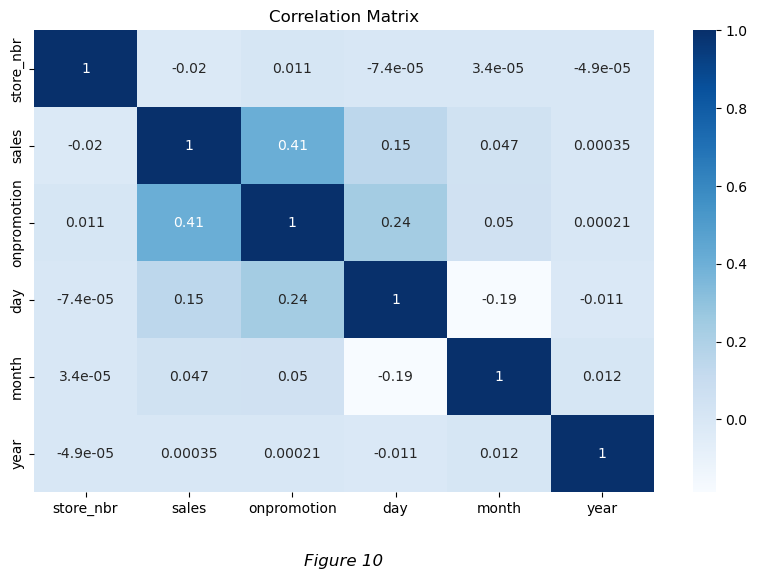

In [19]:
corr_matrix = eda_df.drop(columns=['family', 'id']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.text(0.5, -0.15, 'Figure 10', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

- Since this is a time-series problem, we will be putting a heavier emphasis on the _date_ variable by separating it into day, month, and year. Above, you can see it performed on the _eda_df_ which has been used for testing data augmentation without impacting the original dataset. Now, these changes can be applied in the feature engineering step., so that _date_ can be made more useful. Observe the .25 correlation between _day_ and _sales_. _store_nbr_ is still low and will be changed. _month_ and _year_ are also low, but will be kept for now.


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>

<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.


In [20]:
# Apply sales and onpromotion transformation
train_df['onpromotion'] = np.log1p(train_df['onpromotion'])
train_df['sales'] = np.log1p(train_df['sales'])

In [21]:
# Import useful CSV'set
holiday_events_df = pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')

In [22]:
# Show the imported CVS's head
display(holiday_events_df.head())
display(stores_df.head())

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [23]:
# Separate useful df's into smaller df's
national_holiday_df = holiday_events_df[(holiday_events_df['locale'] == 'National') & (holiday_events_df['type'] == 'Holiday')]['date']
national_not_holiday_df = holiday_events_df[(holiday_events_df['locale'] == 'National') & (holiday_events_df['type'] != 'Holiday')]['date']

local_holiday_df = holiday_events_df[(holiday_events_df['locale'] == 'Local') & (holiday_events_df['type'] == 'Holiday')]['date']
local_not_holiday_df = holiday_events_df[(holiday_events_df['locale'] == 'Local') & (holiday_events_df['type'] != 'Holiday')]['date']

In [24]:
def holiday_transform(dataframe):
    dataframe['national_holiday'] = dataframe['date'].isin(national_holiday_df).astype(int)
    dataframe['national_not_holiday'] = dataframe['date'].isin(national_not_holiday_df).astype(int)
    dataframe['local_holiday'] = dataframe['date'].isin(local_holiday_df).astype(int)
    dataframe['local_not_holiday'] = dataframe['date'].isin(local_not_holiday_df).astype(int)
    return dataframe

def date_transform(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['day'] = dataframe['date'].dt.strftime('%Y')
    dataframe['month'] = dataframe['date'].dt.strftime('%m')
    dataframe['year'] = dataframe['date'].dt.strftime('%d')
    dataframe = dataframe.drop(columns=['date'])
    return dataframe

In [25]:
train_df = date_transform(holiday_transform((train_df)))
train_df.head()

,id,store_nbr,family,sales,onpromotion,national_holiday,national_not_holiday,local_holiday,local_not_holiday,day,month,year
0,0,1,AUTOMOTIVE,0.00,0.00,1,0,0,0,2013,01,01
1,1,1,BABY CARE,0.00,0.00,1,0,0,0,2013,01,01
2,2,1,BEAUTY,0.00,0.00,1,0,0,0,2013,01,01
3,3,1,BEVERAGES,0.00,0.00,1,0,0,0,2013,01,01
4,4,1,BOOKS,0.00,0.00,1,0,0,0,2013,01,01


In [26]:
# transform 'store_nbr' based on what cluster, city, and state it is in
def store_transform(dataframe):
    dataframe['store_cluster'] = stores_df['cluster'].values[dataframe['store_nbr'].values - 1]
    dataframe['city'] = stores_df['city'].values[dataframe['store_nbr'].values - 1]
    dataframe['state'] = stores_df['state'].values[dataframe['store_nbr'].values - 1]
    dataframe = dataframe.drop(columns=['store_nbr'])
    return dataframe

train_df = store_transform(train_df)

In [27]:
# Display manual transformations so far
train_df.head()

,id,family,sales,onpromotion,national_holiday,national_not_holiday,local_holiday,local_not_holiday,day,month,year,store_cluster,city,state
0,0,AUTOMOTIVE,0.00,0.00,1,0,0,0,2013,01,01,13,Quito,Pichincha
1,1,BABY CARE,0.00,0.00,1,0,0,0,2013,01,01,13,Quito,Pichincha
2,2,BEAUTY,0.00,0.00,1,0,0,0,2013,01,01,13,Quito,Pichincha
3,3,BEVERAGES,0.00,0.00,1,0,0,0,2013,01,01,13,Quito,Pichincha
4,4,BOOKS,0.00,0.00,1,0,0,0,2013,01,01,13,Quito,Pichincha


C:\Users\sarad\AppData\Local\Temp\ipykernel_24552\1148231015.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


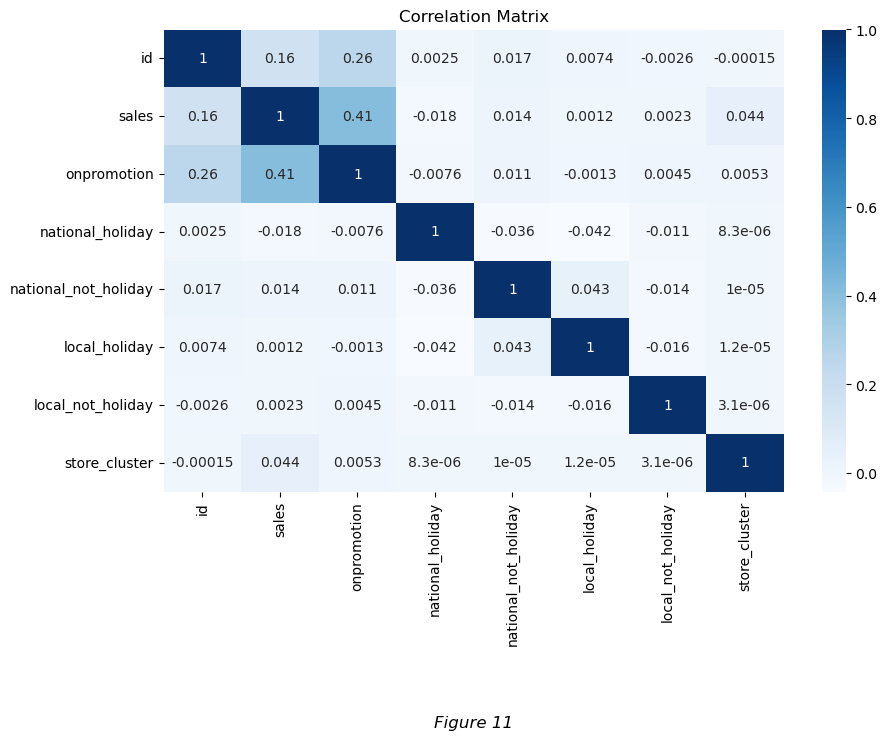

In [28]:
''' Quick Feature Test'''
corr_matrix = train_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.text(0.5, -0.5, 'Figure 11', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')

plt.show()

### Separating Feature Vectors and Targets


In [29]:
X_train = train_df.drop(columns=['sales'])
y_train = train_df['sales']

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>


### Identifying different feature types and the transformations to apply on each feature type.


In [30]:
# Feature List
categorical_features = ['family', 'store_cluster', 'city', 'state'] # One Hot Encoded
binary_features = ['national_holiday', 'national_not_holiday', 'local_holiday', 'local_not_holiday'] # One Hot Encoded (Binary)
scaling_features = ['onpromotion', 'day', 'month', 'year'] # MinMax Scaled
drop_features = ['id'] # Drop
target = 'sales'

### Defining a column transformer and perform preprocessing on the train set


In [31]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)
scaling_transformer = StandardScaler()

preprocessor = make_column_transformer(
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features),
    (scaling_transformer, scaling_features),
    ('drop', drop_features),
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['family', 'store_cluster', 'city', 'state']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['national_holiday', 'national_not_holiday',
                                  'local_holiday', 'local_not_holiday']),
                                ('standardscaler', StandardScaler(),
                                 ['onpromotion', 'day', 'month', 'year']),
                                ('drop', 'drop', ['id'])])

In [32]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_train_prepared

array([[ 1.        ,  0.        ,  0.        , ..., -1.21581106,
        -1.46772591, -1.66979006],
       [ 0.        ,  1.        ,  0.        , ..., -1.21581106,
        -1.46772591, -1.66979006],
       [ 0.        ,  0.        ,  1.        , ..., -1.21581106,
        -1.46772591, -1.66979006],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.96342305,
        -0.90051777,  1.29462525],
       [ 0.        ,  0.        ,  0.        , ...,  1.96342305,
        -0.90051777,  1.29462525],
       [ 0.        ,  0.        ,  0.        , ...,  1.96342305,
        -0.90051777,  1.29462525]])

In [33]:
column_names = list(
    preprocessor.named_transformers_["onehotencoder-1"].get_feature_names_out(categorical_features)) + list(
    preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out(binary_features)) + scaling_features

column_names

['family_AUTOMOTIVE',
 'family_BABY CARE',
 'family_BEAUTY',
 'family_BEVERAGES',
 'family_BOOKS',
 'family_BREAD/BAKERY',
 'family_CELEBRATION',
 'family_CLEANING',
 'family_DAIRY',
 'family_DELI',
 'family_EGGS',
 'family_FROZEN FOODS',
 'family_GROCERY I',
 'family_GROCERY II',
 'family_HARDWARE',
 'family_HOME AND KITCHEN I',
 'family_HOME AND KITCHEN II',
 'family_HOME APPLIANCES',
 'family_HOME CARE',
 'family_LADIESWEAR',
 'family_LAWN AND GARDEN',
 'family_LINGERIE',
 'family_LIQUOR,WINE,BEER',
 'family_MAGAZINES',
 'family_MEATS',
 'family_PERSONAL CARE',
 'family_PET SUPPLIES',
 'family_PLAYERS AND ELECTRONICS',
 'family_POULTRY',
 'family_PREPARED FOODS',
 'family_PRODUCE',
 'family_SCHOOL AND OFFICE SUPPLIES',
 'family_SEAFOOD',
 'store_cluster_1',
 'store_cluster_2',
 'store_cluster_3',
 'store_cluster_4',
 'store_cluster_5',
 'store_cluster_6',
 'store_cluster_7',
 'store_cluster_8',
 'store_cluster_9',
 'store_cluster_10',
 'store_cluster_11',
 'store_cluster_12',
 'stor

In [34]:
X_trained_transformed = pd.DataFrame(X_train_prepared, columns=column_names)
X_trained_transformed

,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,...,state_Santo Domingo de los Tsachilas,state_Tungurahua,national_holiday_1,national_not_holiday_1,local_holiday_1,local_not_holiday_1,onpromotion,day,month,year
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,-0.29,-1.22,-1.47,-1.67
1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,-0.29,-1.22,-1.47,-1.67
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,-0.29,-1.22,-1.47,-1.67
3,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,-0.29,-1.22,-1.47,-1.67
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,-0.29,-1.22,-1.47,-1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100616,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.29,1.96,-0.90,1.29
2100617,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.29,1.96,-0.90,1.29
2100618,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.48,1.96,-0.90,1.29
2100619,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.29,1.96,-0.90,1.29


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>

<hr>

**Your tasks:**

1. Try `scikit-learn`'s baseline model and report results.


In [48]:
X_test = test_df.drop(columns=['sales'])
y_test = test_df['sales']

y_test = np.log1p(y_test)
X_test['onpromotion'] = np.log1p(X_test['onpromotion'])

X_test_prep = store_transform(date_transform(holiday_transform((X_test))))
X_test_prepared = preprocessor.transform(X_test_prep)
X_test_transformed = pd.DataFrame(X_test_prepared, columns=column_names)

In [34]:
# Use skikit learn baseline model for numerical variables
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_trained_transformed, y_train)
dummy_reg.score(X_test_transformed, y_test)

-0.09962081280550894

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>

<hr>

**Your tasks:**

1. Try a linear model as a first real attempt.
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter.
3. Report cross-validation scores along with standard deviation.
4. Summarize your results.


In [35]:
# Step 1: Create a model
model = Ridge()
model.fit(X_trained_transformed, y_train)
model.score(X_test_transformed, y_test)

0.7451315014543844

In [40]:
# Step 2: Hyperparameter tuning
# Define the parameter grid
param_grid = {'alpha': np.arange(0, 5, 0.1)}

# Initialize the Randsearch object
rand_search = RandomizedSearchCV(model, param_grid, cv=5, n_iter=20)

# Fit the RandomizedSearchCV object to the data
rand_search.fit(X_trained_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [41]:
print("Best params: ", rand_search.best_params_)

print("Best score: ", rand_search.best_score_)

pd.DataFrame(rand_search.cv_results_)[
    [
        "mean_test_score",
        "param_alpha",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Best params:  {'alpha': 4.800000000000001}
Best score:  0.6978555158852605


rank_test_score,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
mean_test_score,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70,0.70
param_alpha,4.80,4.70,4.60,4.40,4.30,4.20,3.40,3.20,2.90,2.80,2.40,2.30,2.00,1.90,1.70,1.50,1.30,0.60,0.30,0.20
mean_fit_time,1.65,1.61,1.53,1.57,1.54,1.49,1.64,1.64,1.63,1.54,1.56,1.59,1.65,1.57,1.54,1.60,1.71,1.56,1.53,2.06


In [48]:
# cross validate with best params
best_alpha = rand_search.best_params_.get('alpha')
model = Ridge(alpha=best_alpha)
cv_results = cross_validate(model, X_trained_transformed, y_train, cv=10, scoring='r2')
print("CV Mean: ", cv_results['test_score'].mean())
print("CV Std Dev: ", cv_results['test_score'].std())

CV Mean:  0.7115303080229861
CV Std Dev:  0.022309052533986486


In [49]:
pd.DataFrame(cv_results)

,fit_time,score_time,test_score
0,2.06,0.04,0.68
1,2.05,0.05,0.73
2,1.88,0.05,0.72
3,1.98,0.05,0.67
4,1.74,0.04,0.70
5,1.68,0.05,0.69
6,1.67,0.04,0.71
7,1.63,0.04,0.74
8,1.92,0.05,0.74
9,1.84,0.04,0.72


The linear model is a good first attempt as it is simple and easy to understand and the standard deviation is very low. The hyperparameter tuning has cross validations scores that are lower than the inital ridge regression default. Overall this insinuates that the linear model might be a good fit for the data. 

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>

<hr>

**Your tasks:**

1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model.
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model?


In [61]:
model = KNeighborsRegressor()
model.fit(X_trained_transformed, y_train)
model.score(X_test_transformed, y_test)

NameError: name 'X_test_transformed' is not defined

In [ ]:
model - DecisionTreeRegressor()
model.fit(X_trained_transformed, y_train)
model.score(X_test_transformed, y_test)

In [ ]:
model = SVC()
model.fit(X_trained_transformed, y_train)
model.score(X_test_transformed, y_test)

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>

<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it.


In [35]:
lr = make_pipeline(preprocessor, Ridge(alpha=1))
lr_fitted = lr.fit(X_train, y_train)

In [36]:
# Your code here
coefs = lr.named_steps["ridge"].coef_
coef_df = pd.DataFrame(data=coefs, index=column_names, columns=["Coefficient"])

# separate negative from positive coefficients
coef_df = pd.DataFrame(coef_df.sort_values(by="Coefficient", ascending=False))

In [44]:
lr_coefs_family = coef_df.loc[coef_df.index.str.startswith("family_")]
lr_coefs_family

,Coefficient
family_GROCERY I,4.21
family_BEVERAGES,3.71
family_CLEANING,3.35
family_DAIRY,2.75
family_BREAD/BAKERY,2.59
family_MEATS,2.22
family_POULTRY,2.16
family_PERSONAL CARE,2.15
family_DELI,2.06
family_EGGS,1.64


In [60]:
coefs = lr.named_steps["ridge"].coef_
pred = lr.predict(X_test)
coef_df = pd.DataFrame(data=coefs, index=column_names, columns=["Coefficient"])
coef_df


,Coefficient
family_AUTOMOTIVE,-1.10
family_BABY CARE,-2.59
family_BEAUTY,-1.60
family_BEVERAGES,3.71
family_BOOKS,-2.61
...,...
local_not_holiday_1,0.01
onpromotion,0.24
day,0.37
month,0.18


In [48]:
# Create a correlation dataframe
corr_df = pd.DataFrame(X_train_enc, columns=column_names).corr()
corr_df[corr_df == 1] = 0


ValueError: Shape of passed values is (2100621, 1), indices imply (2100621, 96)

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>

<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.

- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)


In [ ]:
# Your code here


_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>

<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models.
2. Summarize your observations.


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>

<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>

<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>

<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers. Discuss other ideas that you did not try but could potentially improve the performance/interpretability .


<!-- END QUESTION -->

<br><br>
